In [1]:
from PMP_importlib import measurement as ms
import numpy as np
import pandas as pd

import import_ipynb
from hall_data import anneal as anneal_dtype
import seaborn as sns


importing Jupyter notebook from hall_data.ipynb


In [2]:
datafolder = '../data/Hall_order/'
#!ls $datafolder
from glob import glob
files = glob(datafolder + '*.xlsx')
#files

In [3]:
from pathlib import Path

df = pd.DataFrame()

for file in files:
    order, anneal = Path(file).stem.split('_')
    sequential = order == 'full'
    data = ms.HallMeasurement(file).asDict()
    df = df.append({
        'anneal'   : anneal,
        'order'    : order,
        **data
    }, ignore_index=True)
    
df.anneal = df.anneal.astype(anneal_dtype)
df = df.astype('float', errors = 'ignore')

    

In [58]:
"""
p = sns.lineplot(x = 'anneal', 
                 y = 'Sheet carrier concentration',
                 style = 'order',                 
                 data = df)
"""

"\np = sns.lineplot(x = 'anneal', \n                 y = 'Sheet carrier concentration',\n                 style = 'order',                 \n                 data = df)\n"

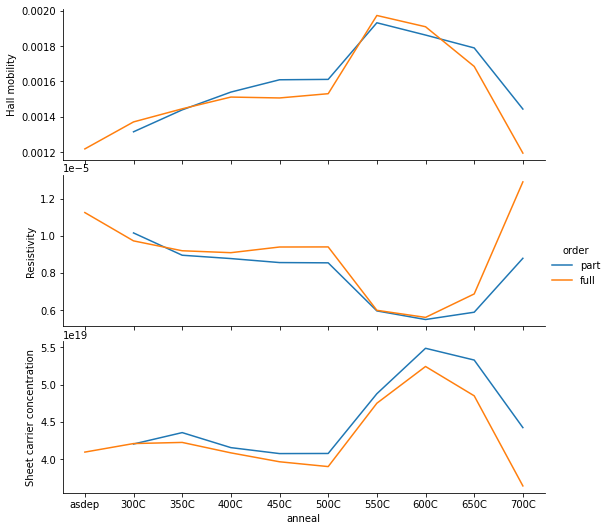

In [4]:
g = sns.PairGrid(
    df,
    x_vars = ['anneal'],
    y_vars = ['Hall mobility', 'Resistivity', 'Sheet carrier concentration'],
    hue = 'order',
    aspect = 3,
)
g.map(sns.lineplot)
g.add_legend()